# Introduction

This dataset is from a 2017 mandatory gender pay gap reporting requirement for businesses in the UK. The gender pay gap is expressed as the difference between the average earnings of men and women, expressed relative to men’s earnings. For example, ‘women earn 15% less than men per hour’.

This data is interesting becuase it allows us to analyze a hot topic and conclude if there is a significant pay gap in the UK, and if there is a difference in the pay gap between different industry groups. This can be informative for government policies, for business owners, and for females thinking about which industry to go into in the UK.

Link to Data: https://data.gov.uk/dataset/54219db1-dd98-49d9-a383-a5978bb0aeb9/gender-pay-gap    


## Research Design

I would like to answer the questions: 
1. Is there a gender pay gap in the UK overall? (i.e. is the mean pay gap percentage = 0 or not?)
2. Are there signficicant difference in the gender pay gap between industries?

My hypothesis are:
1. There is indeed a significant, positive gender pay gap in the UK (meaning males earn more than females)   
    -this can be tested with a one sample t-test
2. There are significant differences in the pay gap between industries, with Finance, Insurance and Real Estate    having the largest gap   
    -this can be tested with one-way ANOVA or Kruscal Wallis test & visualized with a box plot    
    -I will also need to use the sic codes to section the data by industry
    
Additionally, this data is suited for experiment
 - no bias in reporting due to government requirement
 - large dataset representative of population

Chart used to determine the industries of SIC codes:
    
10000-14990	Mining   
15000-17990	Construction   
18000-19990	not used   
20000-39990	Manufacturing   
40000-49990	Transportation, Communications, Electric, Gas and Sanitary service   
50000-51990	Wholesale Trade   
52000-59990	Retail Trade   
60000-67990	Finance, Insurance and Real Estate   
70000-89990	Services   
91000-97290	Public Administration   
99000-99990	Nonclassifiable     
    
for a complete list of the industries in each group: https://en.wikipedia.org/wiki/Standard_Industrial_Classification

## Audience 

This research will be valuable for UK citizens who are wanting to educate others on the gender pay gap. It will also be useful for businesses in the UK in the given industries, to see how they compare and evaluate their hiring/promotion strategies. Finally, it can be useful for females in the UK that have a choice in industries to go into.

# Analysis

In [2]:
import nbconvert

In [58]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math

In [94]:
#explore the data
pay = pd.read_csv('UK Gender Pay Gap Data_05_06.csv',dtype = {'SicCodes':'str'})
pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10332 entries, 0 to 10331
Data columns (total 23 columns):
EmployerName                 10332 non-null object
Address                      10332 non-null object
CompanyNumber                8993 non-null object
SicCodes                     9763 non-null object
DiffMeanHourlyPercent        10332 non-null float64
DiffMedianHourlyPercent      10332 non-null float64
DiffMeanBonusPercent         10332 non-null float64
DiffMedianBonusPercent       10332 non-null float64
MaleBonusPercent             10332 non-null float64
FemaleBonusPercent           10332 non-null float64
MaleLowerQuartile            10332 non-null float64
FemaleLowerQuartile          10332 non-null float64
MaleLowerMiddleQuartile      10332 non-null float64
FemaleLowerMiddleQuartile    10332 non-null float64
MaleUpperMiddleQuartile      10332 non-null float64
FemaleUpperMiddleQuartile    10332 non-null float64
MaleTopQuartile              10332 non-null float64
FemaleTopQuar

In [60]:
pay.head()

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline
0,"""Bryanston School"",Incorporated","Bryanston House,\r\nBlandford,\r\nDorset,\r\nU...",00226143,85310,18.0,28.2,0.0,0.0,0.0,0.0,...,49.2,49.2,50.8,51.5,48.5,https://www.bryanston.co.uk/employment,Nick McRobb (Bursar and Clerk to the Governors),500 to 999,"""Bryanston School"",Incorporated",False
1,"""RED BAND"" CHEMICAL COMPANY, LIMITED","19, Smith's Place,\r\nLeith Walk,\r\nEdinburgh...",SC016876,47730,2.3,-2.7,15.0,37.5,15.6,66.7,...,74.6,10.3,89.7,18.1,81.9,NaN,Philip Galt (Managing Director),250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False
2,118 LIMITED,"Fusion Point,\r\nDumballs Road,\r\nCardiff,\r\...",03951948,61900,1.7,2.8,13.1,13.6,70.0,57.0,...,47.0,50.0,50.0,58.0,42.0,NaN,"Emma Crowe (VP, Human Resources)",500 to 999,118 LIMITED,False
3,1610 LIMITED,"Hestercombe House,\r\nCheddon Fitzpaine,\r\nTa...",06727055,93110,-22.0,-34.0,-47.0,-67.0,25.0,75.0,...,48.0,30.0,70.0,24.0,76.0,https://www.1610.org.uk/gender-pay-gap/,Tim Nightingale (CEO),250 to 499,1610 LIMITED,True
4,1879 EVENTS MANAGEMENT LIMITED,"The Sunderland Stadium Of Light,,\r\nSunderlan...",07743495,"56210,\r\n70229",13.4,8.1,41.4,43.7,8.7,3.2,...,50.6,22.8,77.2,58.2,41.8,https://www.safc.com/news/club-news/2018/march...,Jo Graham (Deputy HR Manager),250 to 499,1879 EVENTS MANAGEMENT LIMITED,False


In [61]:
#checking percentage of null values
print(pay.isna().sum()/len(pay))

#only .05% of SIC codes are null, so the by industry analysis will not be too affected with this large of a dataset

EmployerName                 0.000000
Address                      0.000000
CompanyNumber                0.129597
SicCodes                     0.055072
DiffMeanHourlyPercent        0.000000
DiffMedianHourlyPercent      0.000000
DiffMeanBonusPercent         0.000000
DiffMedianBonusPercent       0.000000
MaleBonusPercent             0.000000
FemaleBonusPercent           0.000000
MaleLowerQuartile            0.000000
FemaleLowerQuartile          0.000000
MaleLowerMiddleQuartile      0.000000
FemaleLowerMiddleQuartile    0.000000
MaleUpperMiddleQuartile      0.000000
FemaleUpperMiddleQuartile    0.000000
MaleTopQuartile              0.000000
FemaleTopQuartile            0.000000
CompanyLinkToGPGInfo         0.259485
ResponsiblePerson            0.161537
EmployerSize                 0.000000
CurrentName                  0.000000
SubmittedAfterTheDeadline    0.000000
dtype: float64


In [99]:
#data cleaning
new = pay["SicCodes"].str.split(',\r\n', n = 1, expand = True) 

In [101]:
pay['Sic1'] = new[0]
pay['Sic2'] = new[1]
pay

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,Sic1,Sic2
0,"""Bryanston School"",Incorporated","Bryanston House,\r\nBlandford,\r\nDorset,\r\nU...",00226143,85310,18.0,28.2,0.0,0.0,0.0,0.0,...,50.8,51.5,48.5,https://www.bryanston.co.uk/employment,Nick McRobb (Bursar and Clerk to the Governors),500 to 999,"""Bryanston School"",Incorporated",False,85310,None
1,"""RED BAND"" CHEMICAL COMPANY, LIMITED","19, Smith's Place,\r\nLeith Walk,\r\nEdinburgh...",SC016876,47730,2.3,-2.7,15.0,37.5,15.6,66.7,...,89.7,18.1,81.9,NaN,Philip Galt (Managing Director),250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False,47730,None
2,118 LIMITED,"Fusion Point,\r\nDumballs Road,\r\nCardiff,\r\...",03951948,61900,1.7,2.8,13.1,13.6,70.0,57.0,...,50.0,58.0,42.0,NaN,"Emma Crowe (VP, Human Resources)",500 to 999,118 LIMITED,False,61900,None
3,1610 LIMITED,"Hestercombe House,\r\nCheddon Fitzpaine,\r\nTa...",06727055,93110,-22.0,-34.0,-47.0,-67.0,25.0,75.0,...,70.0,24.0,76.0,https://www.1610.org.uk/gender-pay-gap/,Tim Nightingale (CEO),250 to 499,1610 LIMITED,True,93110,None
4,1879 EVENTS MANAGEMENT LIMITED,"The Sunderland Stadium Of Light,,\r\nSunderlan...",07743495,"56210,\r\n70229",13.4,8.1,41.4,43.7,8.7,3.2,...,77.2,58.2,41.8,https://www.safc.com/news/club-news/2018/march...,Jo Graham (Deputy HR Manager),250 to 499,1879 EVENTS MANAGEMENT LIMITED,False,56210,70229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10327,Zotefoams PLC,"675 Mitcham Road,\r\nCroydon,\r\nUnited Kingdo...",02714645,"22290,\r\n70100",17.0,11.0,43.0,11.0,93.0,89.0,...,12.0,86.0,14.0,http://www.zotefoams.com/wp-content/uploads/20...,Gary McGrath (Group CFO),250 to 499,Zotefoams PLC,False,22290,70100
10328,ZPG PLC,"The Cooperage,\r\n5 Copper Row,\r\nLondon,\r\n...",09005884,63120,27.8,17.5,39.9,46.9,84.1,84.9,...,36.5,78.5,21.5,http://www.ar17.zpg.co.uk/application/themes/d...,Lorraine Metcalf (Chief Talent Officer),500 to 999,ZPG PLC,False,63120,None
10329,ZURICH EMPLOYMENT SERVICES LIMITED,"The Grange,\r\nBishops Cleeve,\r\nCheltenham,\...",00243883,"78300,\r\n82990",30.0,33.7,54.4,50.3,94.4,95.5,...,47.0,73.0,27.0,https://www.zurich.co.uk/en/about-us/corporate...,Steve Collinson (Head of UK HR),1000 to 4999,ZURICH EMPLOYMENT SERVICES LIMITED,False,78300,82990
10330,ZURICH UK GENERAL SERVICES LIMITED,"The Zurich Centre 3000 Parkway,\r\nWhiteley,\r...",03843124,82990,25.9,26.3,45.0,27.6,94.9,95.2,...,23.0,72.0,28.0,https://www.zurich.co.uk/en/about-us/corporate...,Steve Collinson (Head of UK HR),1000 to 4999,ZURICH UK GENERAL SERVICES LIMITED,False,82990,None


## Analysis of Average Gender Pay Gap

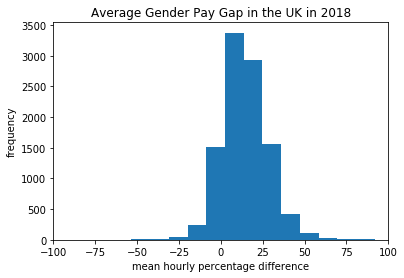

In [7]:
#visualize the mean percentage difference in hourly wages

plt.hist(pay.DiffMeanHourlyPercent, bins = 50)
plt.xlim(-100,100)
plt.xlabel('mean hourly percentage difference')
plt.ylabel('frequency')
plt.title('Average Gender Pay Gap in the UK in 2018')
plt.show();

It's important to note here that a positive value indicates that at a given company, men earn __ % more on averaage per hour than women.

In [8]:
print(stats.describe(pay.DiffMeanHourlyPercent))

DescribeResult(nobs=10332, minmax=(-400.0, 159.0), mean=14.372580332946187, variance=227.86932359000323, skewness=-2.379194164173365, kurtosis=70.27426647650553)


In [9]:
pay.DiffMeanHourlyPercent.describe()

count    10332.000000
mean        14.372580
std         15.095341
min       -400.000000
25%          5.100000
50%         13.400000
75%         23.000000
max        159.000000
Name: DiffMeanHourlyPercent, dtype: float64

The kurtosis value is extremely large, but just to be sure, I ran a wilcoxon test to test for normality

In [112]:
w, p = stats.wilcoxon(pay.DiffMeanHourlyPercent)
print('The p-value is {}'.format(p))

The p-value is 0.0


This leads us to reject the null hypothesis and conclude that the data does not follow a normal distribution. Therefore, the median is a more robust measure of center for this data.

In [113]:
print(pay.DiffMeanHourlyPercent.median())

13.4


In [114]:
from scipy.stats import t, sem
confidence = .95
n = len(pay.DiffMeanHourlyPercent)
median = pay.DiffMeanHourlyPercent.median()
var = pay.DiffMeanHourlyPercent.var()
se = sem(pay.DiffMeanHourlyPercent)
critical_val = t.ppf(confidence,n-1)
h = critical_val * se
l,u = median - h, median + h

In [115]:
print('The median pay gap (on average for hourly wages) is between ',l,'% and ',u,'%')

The median pay gap (on average for hourly wages) is between  13.155703674463481 % and  13.64429632553652 %


So there is a significant pay gap between men and women in all industries on average. What could some of the reasons for this be? Some additional data that would be helpful is to have the mean hourly wage percentage difference broken up by level or position in the company (i.e. "associate," "manager," etc.), which would better answer the question of whether or not women are paid less for the same job.    

## Analysis of Gender Pay Gap by Industry Groups

In [116]:
#sectioning off data
mining = np.arange(10000,15000).astype(str).tolist()
mining_pay = pay[np.logical_or(pay['Sic1'].isin(mining),pay['Sic2'].isin(mining))].DiffMeanHourlyPercent

construction = np.arange(15000,18000).astype(str).tolist()
construction_pay = pay[np.logical_or(pay['Sic1'].isin(construction),pay['Sic2'].isin(construction))].DiffMeanHourlyPercent

mfg = np.arange(20000,40000).astype(str).tolist()
mfg_pay = pay[np.logical_or(pay['Sic1'].isin(mfg),pay['Sic2'].isin(mfg))].DiffMeanHourlyPercent

tcegs = np.arange(40000,50000).astype(str).tolist() #Transportation, Communications, Electric, Gas and Sanitary service
tcegs_pay = pay[np.logical_or(pay['Sic1'].isin(tcegs),pay['Sic2'].isin(tcegs))].DiffMeanHourlyPercent

wholesale = np.arange(50000,52000).astype(str).tolist() 
wholesale_pay = pay[np.logical_or(pay['Sic1'].isin(wholesale),pay['Sic2'].isin(wholesale))].DiffMeanHourlyPercent

retail = np.arange(52000,60000).astype(str).tolist() 
retail_pay = pay[np.logical_or(pay['Sic1'].isin(retail),pay['Sic2'].isin(retail))].DiffMeanHourlyPercent

finance = np.arange(60000,70000).astype(str).tolist()
finance_pay = pay[np.logical_or(pay['Sic1'].isin(finance),pay['Sic2'].isin(finance))].DiffMeanHourlyPercent

services = np.arange(70000,90000).astype(str).tolist()
services_pay = pay[np.logical_or(pay['Sic1'].isin(services),pay['Sic2'].isin(services))].DiffMeanHourlyPercent

admin = np.arange(91000,97300).astype(str).tolist()
admin_pay = pay[np.logical_or(pay['Sic1'].isin(admin),pay['Sic2'].isin(admin))].DiffMeanHourlyPercent

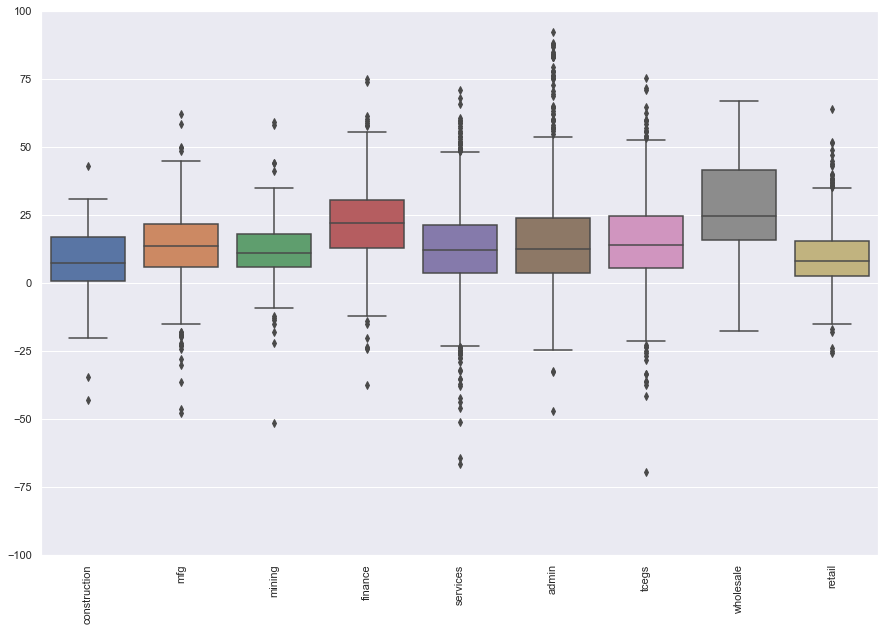

In [124]:
#visualize the data
import seaborn as sns
sns.set()
plt.figure(figsize=(15,10))
f = sns.boxplot( data = [construction_pay,mfg_pay,mining_pay,finance_pay, services_pay, admin_pay,tcegs_pay,wholesale_pay,retail_pay ] );
f.set(xticklabels=['construction','mfg','mining','finance','services','admin','tcegs','wholesale','retail'],ylim=(-100,100))
plt.setp(f.get_xticklabels(), rotation=90);


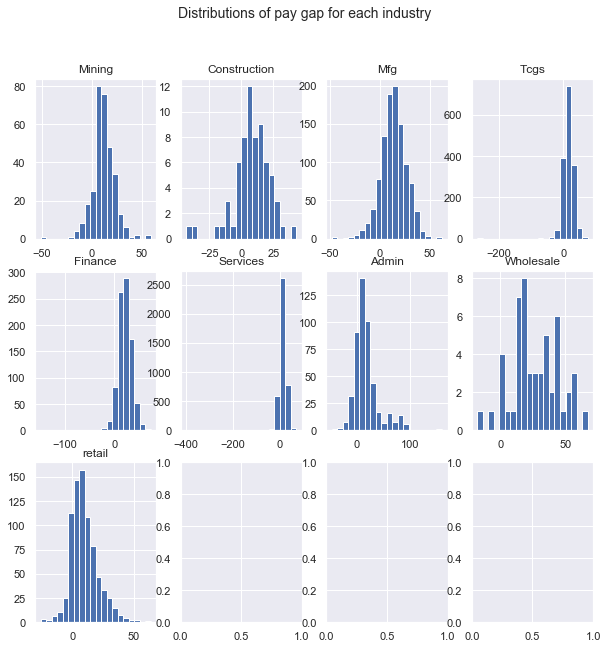

In [118]:
#checking if variables are normally distributed
fig, axs = plt.subplots(3, 4, figsize=(10,10))
axs[0,0].hist(mining_pay,bins=20)
axs[0,0].set_title('Mining')
axs[0,1].hist(construction_pay,bins=20)
axs[0,1].set_title('Construction')
axs[0,2].hist(mfg_pay,bins=20)
axs[0,2].set_title('Mfg')
axs[0,3].hist(tcegs_pay,bins=20)
axs[0,3].set_title('Tcgs')
axs[1,0].hist(finance_pay,bins=20)
axs[1,0].set_title('Finance')
axs[1,1].hist(services_pay,bins=20)
axs[1,1].set_title('Services')
axs[1,2].hist(admin_pay,bins=20)
axs[1,2].set_title('Admin')
axs[1,3].hist(wholesale_pay,bins=20)
axs[1,3].set_title('Wholesale')
axs[2,0].hist(retail_pay,bins=20)
axs[2,0].set_title('retail')
fig.suptitle('Distributions of pay gap for each industry',size=14)

plt.show();

#all have high kurtosis

In [125]:
#since the distributions do not all look normal, running the kruskal test to test if the distributions are the same
stats.kruskal(construction_pay,mfg_pay,mining_pay,finance_pay,services_pay,admin_pay,wholesale_pay,retail_pay)

KruskalResult(statistic=482.7842209897707, pvalue=4.0222800710910267e-100)

With a p-value of 4.0e-100, we reject the null hypothesis and conclude that at least one variable's distribution is different

In [126]:
import scikit_posthocs as sp

In [127]:
#dunn's test for pairwise comparison for non-parametric distributions
#my hypothesis was that the finance industry group has a significantly higher pay gap than other industry groups
#look in the last column to see the p-values for the finance wage gap compared to other groups
results = sp.posthoc_dunn([construction_pay,mfg_pay,mining_pay,tcegs_pay,services_pay,admin_pay,retail_pay,wholesale_pay,finance_pay], p_adjust = 'holm')
results


,1,2,3,4,5,6,7,8,9
1,-1.000000e+00,2.555893e-02,6.463313e-01,2.710915e-03,1.302256e-01,4.710873e-02,1.000000e+00,1.484055e-08,3.989337e-13
2,2.555893e-02,-1.000000e+00,6.355001e-02,5.088034e-01,1.370949e-01,1.000000e+00,2.040844e-13,2.812102e-06,1.265129e-35
3,6.463313e-01,6.355001e-02,-1.000000e+00,6.054688e-04,6.463313e-01,1.859825e-01,6.355001e-02,1.379707e-08,8.604466e-30
4,2.710915e-03,5.088034e-01,6.054688e-04,-1.000000e+00,1.572432e-06,6.463313e-01,1.406608e-22,3.084326e-05,3.196663e-32
5,1.302256e-01,1.370949e-01,6.463313e-01,1.572432e-06,-1.000000e+00,6.463313e-01,1.284680e-11,5.223728e-08,6.499036e-71
6,4.710873e-02,1.000000e+00,1.859825e-01,6.463313e-01,6.463313e-01,-1.000000e+00,1.933025e-08,3.423479e-06,1.902823e-24
7,1.000000e+00,2.040844e-13,6.355001e-02,1.406608e-22,1.284680e-11,1.933025e-08,-1.000000e+00,2.040844e-13,4.796510e-82
8,1.484055e-08,2.812102e-06,1.379707e-08,3.084326e-05,5.223728e-08,3.423479e-06,2.040844e-13,-1.000000e+00,7.048259e-01
9,3.989337e-13,1.265129e-35,8.604466e-30,3.196663e-32,6.499036e-71,1.902823e-24,4.796510e-82,7.048259e-01,-1.000000e+00


Looking in column 9 of the Dunn's test results, there is a significant difference between the median of the finance pay gap and all other industry groups, with the exception of the wholesale trade industry group (row 8).   
   
From the box plots a few cells above, we can conclude that the pay gap in the finance group is indeed higher than all of the other groups besides wholesale.


# Conclusion

My hypothesis were:
1. There is indeed a significant, positive gender pay gap in the UK (meaning males earn more than females)   
2. There are significant differences in the pay gap between industries, with Finance, Insurance and Real Estate    having the largest gap   

The first hypothesis was correct, while the second was mostly correct. The only industry group with a non significant difference was the wholesale industry group.

It would be useful if this dataset included the rank of the position along with the industry, so that there could be comparison amongst more similiar positions. Also, knowing how many female applicants vs. male applicants there were for jobs could help determine if there was likely bias in which gender was promoted or if there were less female applicants for higher paying positions. 

Another analysis that would be interesting and possible with this dataset would be if there were differences in the pay gap between employers of different sizes.